In [1]:
import numpy as np

In [2]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def numerical_derivative(f, x):
  delta_x = 1e-4
  grad = np.zeros_like(x)

  it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])

  while not it.finished:
    idx = it.multi_index
    tmp_val = x[idx]
    x[idx] = float(tmp_val) + delta_x
    fx1 = f(x)

    x[idx] = tmp_val - delta_x
    fx2 = f(x)
    grad[idx] = (fx1 - fx2) / (delta_x * 2)

    x[idx] = tmp_val
    it.iternext()

  return grad

In [23]:
class LogicGate:
  def __init__(self, gate_name, xdata, tdata):
    self.name = gate_name
    
    self.__xdata = xdata.reshape(4, 2)
    self.__tdata = tdata.reshape(4, 1)

    self.__W2 = np.random.rand(2, 6)
    self.__b2 = np.random.rand(6,)
    
    self.__W3 = np.random.rand(6, 1)
    self.__b3 = np.random.rand(1)

    self.__learning_rate = 1e-2


  def feed_forward(self):
    delta = 1e-7

    z2 = np.dot(self.__xdata, self.__W2) + self.__b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.__W3) + self.__b3
    y = a3 = sigmoid(z3)

    return -np.sum( self.__tdata * np.log(y + delta) + (1 - self.__tdata) * np.log(1 - y) + delta)

  def loss_val(self):
    delta = 1e-7

    z2 = np.dot(self.__xdata, self.__W2) + self.__b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.__W3) + self.__b3
    y = a3 = sigmoid(z3)

    return -np.sum( self.__tdata * np.log(y + delta) + (1 - self.__tdata) * np.log(1 - y) + delta)

  def train(self):

    f = lambda x : self.feed_forward()

    print('initial loss value = ', self.loss_val())

    for step in range(10001):

      self.__W2 -= self.__learning_rate * numerical_derivative(f, self.__W2)

      self.__b2 -= self.__learning_rate *  numerical_derivative(f, self.__b2)

      self.__W3 -= self.__learning_rate * numerical_derivative(f, self.__W3)

      self.__b3 -= self.__learning_rate * numerical_derivative(f, self.__b3)

      if (step % 400 == 0):
        print("self = ", step, ' , loss value = ', self.loss_val())
      
  def predict(self, xdata):

    z2 = np.dot(xdata, self.__W2) + self.__b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.__W3) + self.__b3
    y = a3 = sigmoid(z3)

    
    if y > 0.5:
      result = 1
    else:
      result = 0

    return y, result

In [24]:
xdata = np.array([0, 0, 0, 1, 1, 0, 1, 1]).reshape(4, 2)
tdata = np.array([0, 1, 1, 0])

xor_obj = LogicGate('XOR', xdata, tdata)

xor_obj.train()

initial loss value =  5.544894132798794
self =  0  , loss value =  5.423375415313796
self =  400  , loss value =  2.778077343435685
self =  800  , loss value =  2.774783053316498
self =  1200  , loss value =  2.77173653083588
self =  1600  , loss value =  2.768626886999516
self =  2000  , loss value =  2.765134448987366
self =  2400  , loss value =  2.760877190428281
self =  2800  , loss value =  2.7553506433777497
self =  3200  , loss value =  2.7478563482377547
self =  3600  , loss value =  2.7374220560964715
self =  4000  , loss value =  2.722728248700049
self =  4400  , loss value =  2.7020593014580734
self =  4800  , loss value =  2.6732771180619945
self =  5200  , loss value =  2.6337955169611975
self =  5600  , loss value =  2.5806184507559786
self =  6000  , loss value =  2.510714846494283
self =  6400  , loss value =  2.421964345845109
self =  6800  , loss value =  2.3140974518014668
self =  7200  , loss value =  2.1882756402314527
self =  7600  , loss value =  2.0452826222911

In [26]:
test_data = np.array([0, 0, 0, 1, 1, 0, 1, 1]).reshape(4, 2)

for data in test_data:
  print(data)
  print(xor_obj.predict(data))

[0 0]
(array([0.08944351]), 0)
[0 1]
(array([0.75172184]), 1)
[1 0]
(array([0.81115017]), 1)
[1 1]
(array([0.32309214]), 0)


# 손글씨 글자 인식 (MNIST)

In [2]:
from keras.datasets import mnist

In [3]:
(x_train_data, t_train_data), (x_test_data, t_test_data) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train_data.shape)

print(x_test_data.shape)

print(t_train_data.shape)

print(t_test_data.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2


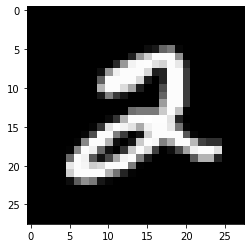

In [5]:
import matplotlib.pyplot as plt

img = x_train_data[5]
print(x_train_data[0][1])
print(t_train_data[5])
plt.imshow(img, cmap = 'gray')
plt.show()

In [6]:
x_train_data.reshape(60000, 784)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

코드 아키텍쳐
1. def sigmoid
2. def numerical_derivative
3. class NeuralNetwork(self, input_nodes, hidden_nodes, output_nodes)
4. 검사

In [7]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [8]:
def numerical_derivative(f, x):

  delta_x = 1e-4
  grad = np.zeros_like(x)
  it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])

  while not it.finished:
    idx = it.multi_index
    tmp_val = x[idx]

    x[idx] = float(tmp_val) + delta_x
    fx1 = f(x)

    x[idx] = tmp_val - delta_x
    fx2 = f(x)

    grad[idx] = (fx1 - fx2) / (2 * delta_x)

    x[idx] = tmp_val
    it.iternext()
    
  return grad

In [20]:
class NeuralNetwork:
  def __init__(self, input_nodes, hidden_nodes, output_nodes):
    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.W2 = np.random.rand(input_nodes, hidden_nodes)
    self.b2 = np.random.rand(hidden_nodes,)

    self.W3 = np.random.rand(hidden_nodes, output_nodes)
    self.b3 = np.random.rand(output_nodes,)

    self.learning_rate = 1e-3

  def feed_forward(self):
    
    delta = 1e-7 #log 발산 방지
  
    
    z2 = np.dot(self.input_data, self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    a3 = y =sigmoid(z3)

    return -np.sum(self.output_data * np.log(y + delta) + (1 - self.output_data) * np.log((1 - y) + delta))

  def loss_val(self):

    delta = 1e-7
    
    z2 = np.dot(self.input_data, self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    a3 = y =sigmoid(z3)

    return -np.sum(self.output_data * np.log(y + delta) + (1 - self.output_data) * np.log((1 - y) + delta))

  def train(self, x_train_data, t_train_data):

    self.output_data = np.zeros(output_nodes) + 0.01
    self.output_data[int(t_train_data)] = 0.99

    self.input_data = (x_train_data / 255.0 * 0.99) + 0.01

    f = lambda x : self.feed_forward()

    self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)

    self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)

    self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)

    self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)


  def predict(self, input_data):

    z1 = np.dot(input_data, self.W2) + self.b2
    y1 = sigmoid(z1)

    z2 = np.dot(y1, self.W3) + self.b3
    y = sigmoid(z2)

    predicted_num = np.armgax(y)

    return predicted_num

  def accuracy(self, x_test_data):

    matched_list = []
    not_matched_list = []

    for index in range(len(x_test_data)):

      label = int(x_test_data[index, 0])

      data = (x_test_data[index] / 255.0 * 0.99) + 0.01

      predicted_num = self.predict(data)

      if label == predicted_num:
        matched_list.append(index)

      else:
        not_matched_list.append(index)

    print('Current Accuracy = ', 100 * (len(matched_list) / len(x_test_data)), '%')
    return matched_list, not_matched_list


In [11]:
x_train_data = x_train_data.reshape(60000, 784)
x_test_data = x_test_data.reshape(10000, 784)

In [ ]:
import numpy as np

input_nodes = 784
hidden_nodes = 8
output_nodes = 10

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes)

for step in range(30001):

  index = np.random.randint(0, len(x_train_data) - 1)
  nn.train(x_train_data = x_train_data[index], t_train_data = t_train_data[index])

  if step % 200 == 0:
    print('step =', step, ', loss_val =', nn.loss_val())

step = 0 , loss_val = 44.012709376292285
step = 200 , loss_val = 31.24280708218557
step = 400 , loss_val = 18.147780563916342
step = 600 , loss_val = 10.3492990982671
step = 800 , loss_val = 6.29803769587488
step = 1000 , loss_val = 5.0768443826514495
step = 1200 , loss_val = 4.041320256651552
step = 1400 , loss_val = 3.7640606684153783
step = 1600 , loss_val = 3.5858225061731765
step = 1800 , loss_val = 3.6576243987035895
step = 2000 , loss_val = 3.559879054460942
step = 2200 , loss_val = 3.4545921469439405
step = 2400 , loss_val = 3.4559020327010463
step = 2600 , loss_val = 3.429286896841642
step = 2800 , loss_val = 3.494494315270283
step = 3000 , loss_val = 3.4306313218206967
step = 3200 , loss_val = 3.3632590591178646
step = 3400 , loss_val = 3.4229430937164937
step = 3600 , loss_val = 3.5174872709839264
step = 3800 , loss_val = 3.5022224110489386
step = 4000 , loss_val = 3.496486724192895
step = 4200 , loss_val = 3.507640233128395
step = 4400 , loss_val = 3.4125190564975822
step =

# 너무 많은 시간이 걸린다...
# 오차역전파라는 알고리즘으로 이 문제를 해결